In [1]:
import sys
import yaml
import pathlib
import numpy
import pandas
import matplotlib.pyplot as plt
from monte_carlo_utils import make_bins, get_bin, place_into_bins

In [2]:
input_directory = pathlib.Path(
    '/Users/rmueller/Data/MIDOSS/marine_transport_data/'
)

### open master yaml file for 
with open(input_directory/'master.yaml') as file:
    master = yaml.load(file, Loader=yaml.Loader)

### load ATB data
atb_data_df = pandas.read_excel(
    master['files']['oil_capacity'],
    sheet_name='atb data', 
    usecols='A,B,C,D,E'
)    
    
# Get Total number of AIS pings and vessel length by MMSI for
# our different ship types
data = {}
data['count'] = {}
data['length'] = {}
length_bins = {}
for vessel in master['categories']['all_vessels']:
    input_data = pandas.read_excel(
        master['files']['oil_capacity'],
        sheet_name=f'{vessel} data', 
        usecols='B,C'
    )
    data['count'][vessel]  = input_data['COUNT']
    data['length'][vessel] = input_data['LENGTH']
    length_bins[vessel] = {}


In [3]:
# tanker
length_bins['tanker']['lower_bound'] = 0
length_bins['tanker']['upper_bound'] = 300
length_bins['tanker']['step_size']   = 50

# atb
length_bins['atb']['lower_bound'] = 0
length_bins['atb']['upper_bound'] = 300
length_bins['atb']['step_size']   = 50

# barge
length_bins['barge']['lower_bound'] = 0
length_bins['barge']['upper_bound'] = 100
length_bins['barge']['step_size']   = 10

# cargo
length_bins['cargo']['lower_bound'] = 200
length_bins['cargo']['upper_bound'] = 400
length_bins['cargo']['step_size']   = 25

# cruise
length_bins['cruise']['lower_bound'] = 250
length_bins['cruise']['upper_bound'] = 350
length_bins['cruise']['step_size']   = 10

# ferry
length_bins['ferry']['lower_bound'] = 35
length_bins['ferry']['upper_bound'] = 160
length_bins['ferry']['step_size']   = 10

# fishing
length_bins['fishing']['lower_bound'] = 0
length_bins['fishing']['upper_bound'] = 80
length_bins['fishing']['step_size']   = 10

# smallpass
length_bins['smallpass']['lower_bound'] = 0
length_bins['smallpass']['upper_bound'] = 35
length_bins['smallpass']['step_size']   = 5

# other
length_bins['other']['lower_bound'] = 0
length_bins['other']['upper_bound'] = 35
length_bins['other']['step_size']   = 5


### Plot ship tracks by vessel type and length

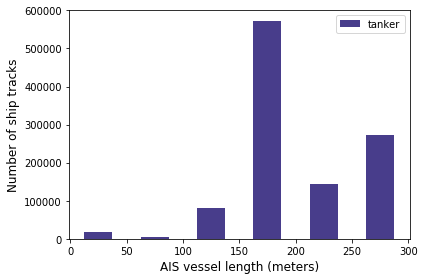

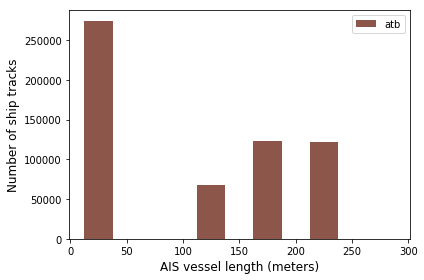

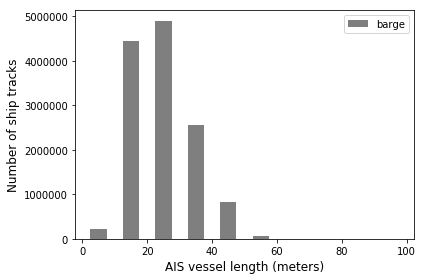

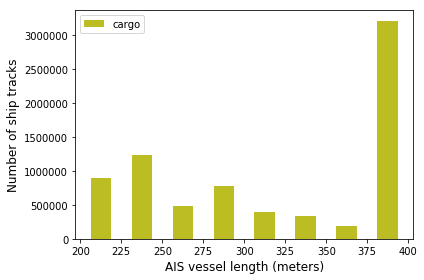

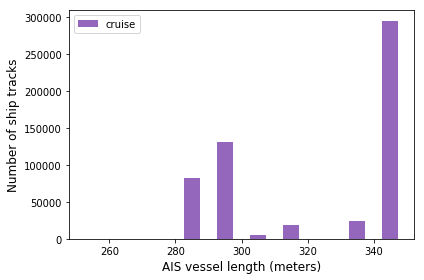

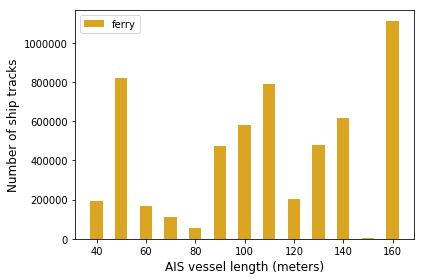

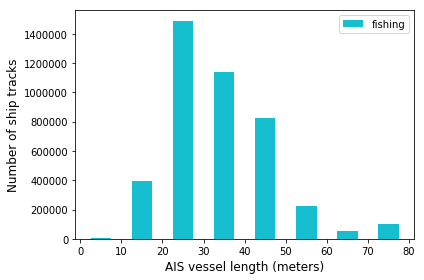

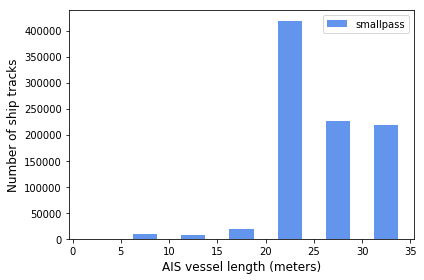

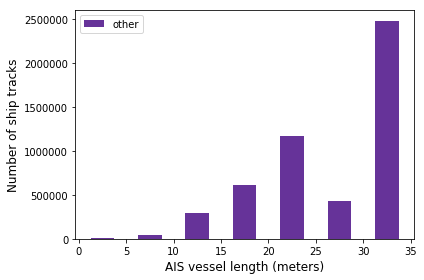

In [15]:
colors = ['darkslateblue', 'tab:brown', 
          'tab:gray', 'tab:olive',
          'tab:purple','goldenrod',
          'tab:cyan','cornflowerblue',
          'rebeccapurple']
color_index=0
for vessel in master['categories']['all_vessels']:

    lower_bound = length_bins[vessel]['lower_bound']
    upper_bound = length_bins[vessel]['upper_bound']
    step_size   = length_bins[vessel]['step_size']

    [bins, bin_centers]  = make_bins(
        lower_bound,
        upper_bound,
        step_size
    )

    binned_count = place_into_bins(
        data['length'][vessel], 
        data['count'][vessel], 
        bins
    )
    if vessel=='atb':
        atb_bin_centers = bin_centers
        atb_binned_count = binned_count

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.bar(
        bin_centers,
        binned_count,
        label=vessel,
        width = step_size/2,
        color=colors[color_index]
    )
    plt.xlabel('AIS vessel length (meters)',fontsize=12)
    plt.ylabel('Number of ship tracks',fontsize=12)
    plt.tight_layout()
    ax1.legend()
    plt.show() 
    
    color_index += 1

### Scale ATB by time interval to see if/how it affects result

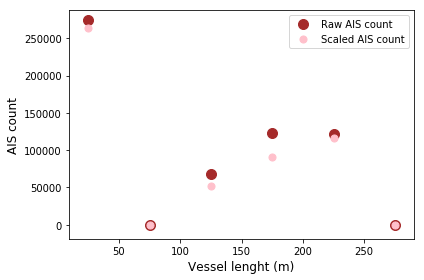

In [16]:
# scale tracks according to time interval between pings
atb_tracks = (atb_data_df['COUNT'] * 
     atb_data_df['Median time between pings (minutes)']/
     numpy.mean(atb_data_df['Median time between pings (minutes)'])
)

lower_bound = length_bins['atb']['lower_bound']
upper_bound = length_bins['atb']['upper_bound']
step_size   = length_bins['atb']['step_size']

[bins, bin_centers]  = make_bins(
    lower_bound,
    upper_bound,
    step_size
)

# place scaled tracks into length bins
binned_tracks = place_into_bins(
    atb_data_df['LENGTH'], 
    atb_tracks, 
    bins
)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(
    atb_bin_centers,
    atb_binned_count,
    100,
    label='Raw AIS count',
    color='brown'
)
ax1.scatter(
    bin_centers,
    binned_tracks,
    50,
    label='Scaled AIS count',
    color='pink'
)
plt.xlabel('Vessel lenght (m)',fontsize=12)
plt.ylabel('AIS count',fontsize=12)
plt.tight_layout()
ax1.legend()
plt.show()

### show AIS pings multiplied by oil capacity

In [18]:
from get_oil_capacity import get_oil_capacity

random_seed=None
# Initialize PCG-64 random number generator
random_generator = numpy.random.default_rng(random_seed)

[fuel,cargo] = get_oil_capacity(input_directory/'master.yaml', 
                                60, 'atb', random_generator)

AttributeError: module 'numpy.random' has no attribute 'default_rng'